In [0]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
import os
plt.xkcd()
%matplotlib inline
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score,confusion_matrix

In [0]:
def mask(labels,n_dummies = 30):

    '''Get labels with n_dummies masked nodes randomly'''
    class_labels = labels.copy()
    idx = np.random.choice(np.arange(len(class_labels)),size = n_dummies,replace = False)
    class_labels[idx] = np.nan
    return class_labels,idx

In [0]:
def label_spread_laplacian(G,masked_labels, n_unlabeled,plot = True,pos = None):

    masked_labels = np.sign(masked_labels - .5)
    masked_labels[np.isnan(masked_labels)] = 0
    n_labeled = len(G.nodes()) - n_unlabeled

    A = nx.to_numpy_array(G)
    D = A.sum(axis = 1).reshape((-1,1))
    L = D - A 

    eigen_values, eigen_vectors = np.linalg.eig(L)
    sorted_eigen_value_ids = np.argsort(eigen_values)
    E = eigen_vectors[:,sorted_eigen_value_ids[:n_labeled]].real

    lr = LinearRegression()
    lr.fit(E,masked_labels)
    coefs = lr.coef_.reshape(-1,1)
    preds = np.sign(np.dot(coefs.T,E.T))[0]
    if plot:
        nx.draw(G,node_color = preds,cmap = plt.get_cmap('Set2'),node_size = 800,with_labels = True,pos = pos)

    return preds

In [0]:
G = nx.karate_club_graph()
labels = [d['club'] for n,d in G.nodes(data = True)]
club_ids = {club:i for i, club in enumerate(set(labels))}
labels = np.array([club_ids[club] for club in labels],dtype = float)

pos = nx.spring_layout(G)

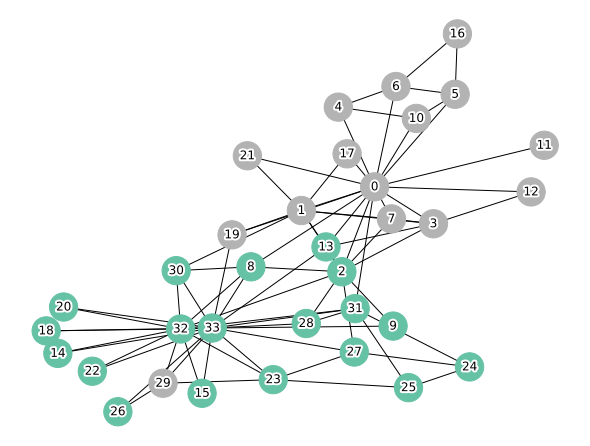

In [18]:
# number of nodes
n_nodes = len(G.nodes())

# number oof unlabeled nodes
n_unlabeled = 28

# masking
masked_labels,idx = mask(labels, n_unlabeled)

# number of labeled nodes
n_labeled = len(G.nodes()) - n_unlabeled

figsize(8,6)
_ = label_spread_laplacian(G,masked_labels, n_unlabeled,plot = True,pos = pos)